# **Tarea Programada**  
**Tópicos de Astronomía y Astrofísica (IF-6008)** \\
**Profesor: José Esteban Pérez** \\

**Elaborado por:** \\
Valentina Campos Aguilar - 2018086257 \\
Andrea De La Peña Castro - 2018124992 \\

**Objetivo General**: Describir y contrastar el horizonte de eventos y la ergosfera de un agujero negro rotante sin carga (Agujero Kerr) a partir de la Métrica de Kerr variando los parámetros de factor de giro y masa del agujero. 


# **Métrica de Kerr**

La métrica de Kerr es una generalización a un cuerpo giratorio de la métrica de Schwarzschild; esta describe la geometría del espacio-tiempo vacío alrededor de un agujero negro simétrico
axialmente giratorio sin carga con un horizonte de eventos cuasiesférico. \\

La métrica de Kerr está dada por:

\begin{equation}
ds^2 = -\left(1-\frac{2Mr}{\sum}\right)dt^2 - \frac{4M \cdot ar \cdot sin^2\theta}{\sum} d\phi dt + \frac{\sum}{\Delta}dr^2 + \sum d\theta^2 + \left(r^2+a^2+\frac{2M \cdot ra^2 \cdot sin^2\theta}{\sum}\right) sin^2\theta d\phi^2
\end{equation}

donde,

$$a = \frac{J}{M}$$ \\
$$\sum = r^2 + a^2cos^2\theta$$ \\
$$\Delta = r^2 - 2Mr + a^2$$ \\

*M* representa la masa del agujero negro y *J* representa el momento angular del mismo. \\

La métrica de Kerr es un conjunto de ecuaciones altamente no lineales y representa una de las soluciones exactas de las Ecuaciones de Einstein de la Relatividad General. \\

El primer objetivo específico del presente proyecto es precisamente asistir la resolución de las ecuaciones de Einsten con métodos computacionales. Para esto, se recurrre a la bliblioteca GraviPy que permite obtener los símbolos de Christoffel, el Tensor de Ricci y los elementos del Tensor de Einstein. Inicialmente, se define el vector de 4 coordenadas ($t$, $r$, $\theta$, $\phi$), la masa del agujero negro y la métrica de Kerr como una matriz diagonalizable. \\

Donde las ecueciones de campo de Einstein están dadas por:
\begin{equation}
R_{\mu \nu}-\frac{1}{2}Rg_{\mu \nu}=8\pi G_n T_{\mu \nu}
\end{equation}
Y el tensor de Einstein es:
\begin{equation}
G_{\mu \nu}= R_{\mu \nu}-\frac{1}{2}Rg_{\mu \nu}=8\pi G T_{\mu \nu}
\end{equation}

In [ ]:
#Se instala el módulo de GraviPy
!pip install gravipy
#Se importan las bibliotecas de cálculo simbólico
import sympy
from sympy import *
import gravipy
from gravipy.tensorial import *

# Se crean símbolos para las variables presentes en la métrica de Kerr
t , r , theta , phi , M , a , rhosq , Delta = symbols ('t , r , theta , phi , M , a , rhosq , Delta ')
# Se define el vector de cuatro coordenadas
x = Coordinates ('\ chi ', [t , r , theta , phi ])

# Se define la métrica de Kerr como una matriz diagonalizable
rhosq = r **2+( a **2) * cos ( theta ) **2 # expresión de la sumatoria
Delta = r **2 -2* M * r + a **2 # expresión del delta
Metric = Matrix ([[(1 -(2* M * r ) / rhosq ) ,0 ,0 ,(2* a * M * r * sin ( theta ) **2) / rhosq ] ,[0 , -
rhosq / Delta ,0 ,0] ,[0 ,0 , - rhosq ,0] ,[(2* a * M * r * sin ( theta ) **2) / rhosq ,0 ,0 , -( sin
( theta ) **2) *(( r **2+ a **2) +(2*( a **2) * M * r * sin ( theta ) **2) / rhosq ) ]])

# Se define el tensor de métrica
g = MetricTensor ('g', x , Metric )

# Se calculan los símbolos de Christoffel y se imprimen todos sus componentes
Ga = Christoffel ('Ga ', g )
print ( 'Símbolos de Christoffel:', Ga ( All , All , All ) )

Ri = Ricci ('Ri ', g )
print ( 'Componente 1,2 del Tensor de Ricci: ', Ri ( 1 , 2 ) )


G = Einstein ('G', Ri )
print ('Componente 1,2 del Tensor de Einstein:', G ( 1 , 2 ) ) 
# Para calcular el Tensor de Einstein se necesitan haber calculado todos los componentes del Tensor de Ricci. 


# NOTA: solo se imprime uno de los componentes del Tensor de Ricci y del Tensor de Einsten porque el tiempo de corrida 
# y la capacidad computacional requerida son muy altos. 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Símbolos de Christoffel: Matrix([[Matrix([
[                                                              0,                -M*(a**2*cos(theta)**2 - r**2)/(a**2*cos(theta)**2 + r**2)**2,           -4*M*a**2*r*sin(2*theta)/(a**2*cos(2*theta) + a**2 + 2*r**2)**2,                                                                            0],
[  -M*(a**2*cos(theta)**2 - r**2)/(a**2*cos(theta)**2 + r**2)**2,                                                                            0,                                                                         0, M*a*(a**2*cos(theta)**2 - r**2)*sin(theta)**2/(a**2*cos(theta)**2 + r**2)**2],
[-4*M*a**2*r*sin(2*theta)/(a**2*cos(2*theta) + a**2 + 2*r**2)**2,                                                                            0,                                                                         0,    4*M*a*r*(a**2 + r**2)*sin(2*theta)/(a**2

\begin{equation}
\Gamma ^0 _{\mu \nu}=
\begin{bmatrix}
0 & -M\cdot \frac{a^2cos(\theta)^2 - r^2}{(a^2cos(\theta)^2 + r^2)^2} & -4 M\cdot \frac{a^2r\cdot sin(2\theta)}{(a^2\cdot cos(2\theta) + a^2 + 2r^2)^2} & 0\\
-M\frac{a^2\cdot cos(\theta)^2 - r^2}{(a^2\cdot cos(\theta)^2 + r^2)^2} & 0 & 0 &  M\frac{a[a^2 \cdot cos(\theta)^2 - r^2]\cdot sin(\theta)^2}{(a^2 \cdot cos(\theta)^2 + r^2)^2}\\
-4 M\cdot \frac{a^2r\cdot sin(2\theta)}{(a^2\cdot cos(2\theta) + a^2 + 2r^2)^2} & 0 & 0 & 4 M\cdot \frac{a\cdot r(a^2 + r^2)sin(2\theta)}{(a^2\cdot cos(2\theta) + a^2 + 2r^2)^2}\\
0 & M\frac{a[a^2 \cdot cos(\theta)^2 - r^2]\cdot sin(\theta)^2}{(a^2 \cdot cos(\theta)^2 + r^2)^2} & 4 M\cdot \frac{a\cdot r(a^2 + r^2)sin(2\theta)}{(a^2\cdot cos(2\theta) + a^2 + 2r^2)^2} & 0
\end{bmatrix}
\end{equation}

\

\begin{equation}
\Gamma ^1 _{\mu \nu}=
\begin{bmatrix}
M\frac{(a^2cos(\theta)^2 - r^2)}{(a^2cos(\theta)^2 + r^2)^2} & 0 & 0 & -Ma\frac{(a^2cos(\theta)^2 - r^2)sin(\theta)^2}{(a^2cos(\theta)^2 + r^2)^2}\\
0 & \frac{-r(-2Mr + a^2 + r^2) + (-M + r)(a^2cos(\theta)^2 + r^2)}{(-2Mr + a^2 + r^2)^2} & \frac{a^2sin(2\theta)}{2(-2Mr + a^2 + r^2)} & 0\\
0 & \frac{a^2sin(2\theta)}{2(-2Mr + a^2 + r^2)} & r & 0\\
-Ma\frac{(a^2cos(\theta)^2 - r^2)sin(\theta)^2}{(a^2cos(\theta)^2 + r^2)^2} & 0 & 0 & Ma^4\frac{sin(\theta)^4cos(\theta)^2- Ma^2 r^2*sin(\theta)^4}{(a^2cos(\theta)^2 + r^2)^2} + rsin(\theta)^2
\end{bmatrix}
\end{equation}

\

\begin{equation}
\Gamma ^2 _{\mu \nu}=
\begin{bmatrix}
\frac{4M\cdot a^2r\cdot sin(2\theta)}{(a^2cos(2\theta) + a^2 + 2r^2)^2} & 0 & 0 & \frac{-4Ma\cdot r(a^2 + r^2)sin(2\theta)}{(a^2cos(2\theta) + a^2 + 2r^2)^2}\\
0 & \frac{-a^2sin(2\theta)}{2(-2M\cdot r + a^2 + r^2)} & -r & 0\\
0 & -r & \frac{a^2sin(2\theta)}{2} & 0\\ 
\frac{-4Ma\cdot r(a^2 + r^2)sin(2\theta)}{(a^2cos(2\theta) + a^2 + 2r^2)^2} & 0 & 0 & \omega \frac{sin(\theta)cos(\theta)}{(a^2cos(\theta)^2 + r^2)^2}
\end{bmatrix}
\end{equation}

Donde:
\begin{equation}
\omega = 2Ma^2r(a^2 + r^2)sin(\theta)^2 +  (a^2cos(\theta)^2 + r^2)\left (2Ma^2r\cdot sin(\theta)^2 + a^2(a^2cos(\theta)^2 + r^2) + r^2(a^2cos(\theta)^2 + r^2) \right )
\end{equation}

\

\begin{equation}
\Gamma ^3 _{\mu \nu}=
\begin{bmatrix}
0 & M\cdot a\frac{(a^2\cdot cos(\theta)^2 - r^2)\cdot sin(\theta)^2}{(a^2\cdot cos(\theta)^2 + r^2)^2} & 4 M\cdot \frac{a\cdot r(a^2 + r^2)\cdot sin(2\theta)}{(a^2cos(2\theta) + a^2 + 2r^2)^2} & 0\\
M\cdot a\frac{(a^2\cdot cos(\theta)^2 - r^2)\cdot sin(\theta)^2}{(a^2\cdot cos(\theta)^2 + r^2)^2} & 0 & 0 &  -Ma^4\frac {sin(\theta)^4cos(\theta)^2}{(a^2cos(\theta)^2 + r^2)^2} + \frac{Ma^2r^2\cdot sin(\theta)^4}{(a^2cos(\theta)^2 + r^2)^2} - r\cdot sin(\theta)^2\\
4 M\cdot \frac{a\cdot r(a^2 + r^2)\cdot sin(2\theta)}{(a^2cos(2\theta) + a^2 + 2r^2)^2} & 0 & 0 & -\chi \frac{sin(\theta)cos(\theta)}{(a^2cos(\theta)^2 + r^2)^2}\\
0 & -Ma^4\frac {sin(\theta)^4cos(\theta)^2}{(a^2cos(\theta)^2 + r^2)^2} + \frac{Ma^2r^2\cdot sin(\theta)^4}{(a^2cos(\theta)^2 + r^2)^2} - r\cdot sin(\theta)^2 & -\chi \frac{sin(\theta)cos(\theta)}{(a^2cos(\theta)^2 + r^2)^2} & 0
\end{bmatrix}
\end{equation}

Donde:
\begin{equation}
\chi =-\left ( 2Ma^2r(a^2 + r^2)sin(\theta)^2 + (a^2cos(\theta)^2 + r^2)[2Ma^2r\cdot sin(\theta)^2 + a^2(a^2cos(\theta)^2 + r^2) + r^2(a^2cos(\theta)^2 + r^2)]\right )
\end{equation}

\

Además, las componente 1,2 y 2,1 del tensor de Ricci son:
\begin{equation}
R_{12}=R_{21}=0
\end{equation}

# **Agujero Kerr**

Se define un Agujero Kerr como un agujero negro rotante ($J$ $\neq$ 0) sin carga ($Q$ $\neq$ 0), donde $J$ representa el momento angular del agujero negro y $Q$ su carga eléctrica. \\

Cuando un cuerpo de gran masa se encuentra en rotación se genera una curvatura giratoria en el espacio-tiempo asociado al cuerpo en rotación. Esta curvatura hará que los objetos que se acerquen al cuerpo rotante se sientan atraídos a participar en la rotación de este. En el caso de un agujero negro rotante, todos los objetos y la luz que se acerquen lo suficiente rotarán con el agujero. Y se define la ergosfera de un agujero negro como esta región donde se atrae la rotación de objetos cercanos. \\

En Relatividad General, se define una singularidad como una curvatura escalar invariante que se vuelve infinita o como una geodésica incompleta. Entonces, la métrica de Kerr que describe el Agujero de Kerr parece tener singularidades aparentes, que se manifiestan como variaciones en la ergosfera y el horizonte de eventos del mismo. Estas variaciones dependerán directamente del factor de giro del agujero negro $a$ que a su vez se define por el momento angular $J$ y la masa $M$ del agujero. \\

Por otro lado, el horizonte de eventos de un agujero negro se define como una hipersuperficie frontera del espacio-tiempo que delimita la región en la cual los objetos y eventos que suceden dentro de este horizonte no pueden afectar a aquellos situados fuera de este. 

Ahora, la métrica de Kerr se puede expresar a partir de las coordenadas de Boyer-Lindquist de la forma:

\begin{equation}
ds^2 = -\left(1-\frac{r r_s}{\sum}\right)c^2dt^2 + \frac{\sum}{\Delta} dr^2 + \sum d\theta^2+ \left(r^2+a^2+\frac{r_s r a^2}{\sum}sin^2\theta \right)sin^2\theta d\phi^2 - \frac{2r_sra\cdot sin^2\theta}{\sum}cdtd\phi
\end{equation}

donde, $r_s$ es el radio de Schwarzchild y $\Delta$ y $\sum$ habían sido definidas previamente. \\

El segundo objetivo específico de este proyecto consisitía en modelar la ergosfera y el horizonte de eventos de un Agujero Kerr a partir de los diferenciales de la métrica de Kerr en coordenadas de BoyerLindquist. Se modelaron dos Agujeros Kerr con parámetros de giro distintos con el fin de observar la variación de las singularidades en la ergosfera y el horizonte de eventos de ambos agujeros. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


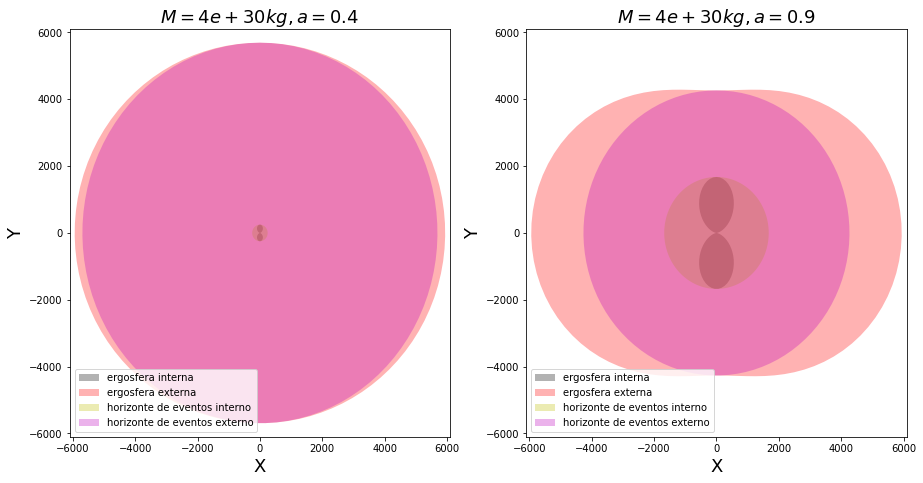

In [ ]:
# Se instala el módulo de EinsteinPy
!pip install einsteinpy
# Se importa la biblioteca de unidades astronómicas
import astropy.units as u
# Se importan las bibliotecas NumPy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Se importa del módulo EinsteinPy las coordenadas de Boyer Lindquist y la métrica de Kerr
from einsteinpy.coordinates import BoyerLindquistDifferential
from einsteinpy.metric import Kerr


# Se define la masa del Agujero Kerr
M = 4e30 * u.kg
# Se definen dos parámetros de giro para dos Agujeros Kerr
a1 = 0.4 * u.one #Agujero Kerr con rotación normal
a2 = 0.9 * u.one #Agujero Kerr con rotación máxima

# Se definen las coordenadas de la métrica, donde el valor de las mismas es irrelevante
bl = BoyerLindquistDifferential(
    t=0. * u.s,
    r=1e3 * u.m,
    theta=np.pi / 2 * u.rad,
    phi=np.pi * u.rad,
    v_r=0. * u.m / u.s,
    v_th=0. * u.rad / u.s,
    v_p=0. * u.rad / u.s,
)

# Se definen los dos Agujeros Kerr
kerr1 = Kerr(coords=bl, M=M, a=a1)
kerr2 = Kerr(coords=bl, M=M, a=a2)

# Se definen las singularidades para ambos agujeros
sing_dict1 = kerr1.singularities()
sing_dict2 = kerr2.singularities()

# Se define un arreglo de ángulos polares para graficar en coordenadas polares
theta = np.linspace(0, 2 * np.pi, 100)

# Se definen las ergosferas internas y externas de ambos agujeros
Ei1, Eo1 = sing_dict1["inner_ergosphere"], sing_dict1["outer_ergosphere"]
Ei2, Eo2 = sing_dict2["inner_ergosphere"], sing_dict2["outer_ergosphere"]

# Se evalúan las ergosferas internas y externas en los ángulos polares definidos para ambos agujeros
Ei1_list, Eo1_list = Ei1(theta), Eo1(theta)
Ei2_list, Eo2_list = Ei2(theta), Eo2(theta)

# Se definen las funciones x y y que describen la ergosfera del primer Agujero Kerr (a = 0,4)
Xei1 = Ei1_list * np.sin(theta)
Yei1 = Ei1_list * np.cos(theta)

Xeo1 = Eo1_list * np.sin(theta)
Yeo1 = Eo1_list * np.cos(theta)

# Se definen las funciones x y y que describen la ergosfera del segundo Agujero Kerr (a = 0,9)
Xei2 = Ei2_list * np.sin(theta)
Yei2 = Ei2_list * np.cos(theta)

Xeo2 = Eo2_list * np.sin(theta)
Yeo2 = Eo2_list * np.cos(theta)

# Se define el horizonte de eventos interno y externo de ambos agujeros
Hi1, Ho1 = sing_dict1["inner_horizon"], sing_dict1["outer_horizon"]
Hi2, Ho2 = sing_dict2["inner_horizon"], sing_dict2["outer_horizon"]

# Se definen las funciones x y y que describen el horizonte de eventos del primer Agujero Kerr (a = 0,4)
Xhi1 = Hi1 * np.sin(theta)
Yhi1 = Hi1 * np.cos(theta)

Xho1 = Ho1 * np.sin(theta)
Yho1 = Ho1 * np.cos(theta)

# Se definen las funciones x y y que describen el horizonte de eventos del segundo Agujero Kerr (a = 0,9)
Xhi2 = Hi2 * np.sin(theta)
Yhi2 = Hi2 * np.cos(theta)

Xho2 = Ho2 * np.sin(theta)
Yho2 = Ho2 * np.cos(theta)

# Se grafican las ergosferas y el horizonte de eventos de ambos Agujeros Kerr
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))

ax1.fill(Xei1, Yei1, 'k', Xeo1, Yeo1, 'r', Xhi1, Yhi1, 'y', Xho1, Yho1, 'm', alpha=0.3)
ax1.set_title(f"$M = {M}, a = {a1}$", fontsize=18)
ax1.set_xlabel("X", fontsize=18)
ax1.set_ylabel("Y", fontsize=18)
ax1.set_xlim([-6100, 6100])
ax1.set_ylim([-6100, 6100])
ax1.legend(['ergosfera interna', 'ergosfera externa', 'horizonte de eventos interno', 'horizonte de eventos externo' ], loc = 'lower left')

ax2.fill(Xei2, Yei2, 'k', Xeo2, Yeo2, 'r', Xhi2, Yhi2, 'y', Xho2, Yho2, 'm', alpha=0.3)
ax2.set_title(f"$M = {M}, a = {a2}$", fontsize=18)
ax2.set_xlabel("X", fontsize=18)
ax2.set_ylabel("Y", fontsize=18)
ax2.set_xlim([-6100, 6100])
ax2.set_ylim([-6100, 6100])
ax2.legend(['ergosfera interna', 'ergosfera externa', 'horizonte de eventos interno', 'horizonte de eventos externo' ], loc = 'lower left')

#**Conclusiones Relevantes**

Cuando el factor de giro del agujero negro se acerca a cero, las singularidades se desvanecen ocasionando que la ergosfera y el horizonte de eventos se vean cuasiesféricos en el Agujero Kerr con rotación normal. Mientras que, conforme el parámetro de giro se acerca a 1, las singularidades toman más prominencia y esto se puede identificar en la geometría que describe la ergosfera y el horizonte de eventos del Agujero Kerr en rotación máxima. 

Cuanto menor sea el momento angular del Agujero Kerr, implicado en el parámetro de giro, el radio del horizonte de eventos aumenta y el radio de la ergosfera decrece. 


# **Referencias Bibliográficas**

[1] I.F. Ranea, 'Perturbaciones Gravitacionales a la Métrica de Kerr', Tesis de Licenciatura en Astronomía, Universidad Nacional de La Plata, 2009. 

[2] M. Bernagozzi, 'A mathematical introduction to Kerr black holes', Tesis en Matemáticas, Universidad de Bologna, 2013. 

[3] T.Birkandan, et. al. 'Symbolic and Numerical Analysis in General Relativity with Open Source Computer Algebra Systems'. Istanbul Technical University, 2018. 

[4] 'Métrica de Kerr'. [Online]. Disponible en: https://hmong.es/wiki/Kerr_metric. [Accessed: 31/05/22]. 


# **Enlaces a repositorios utilizados:**

Métrica de Kerr: 
https://github.com/wojciechczaja/GraviPy/blob/master/docs/GraviPy-tutorial.ipynb

Agujero Kerr: https://docs.einsteinpy.org/en/stable/examples/Visualizing%20Event%20Horizon%20and%20Ergosphere%20%28Singularities%29%20of%20Kerr%20Metric%20or%20Black%20Hole.html